<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 3 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Consideremos la siguiente función:

$$
f(x) = \sin(x)^2 + \sin(x^2)
$$

A continuación se muestra una gráfica de la función en nuestro intervalo de interés $[-5,5]$:

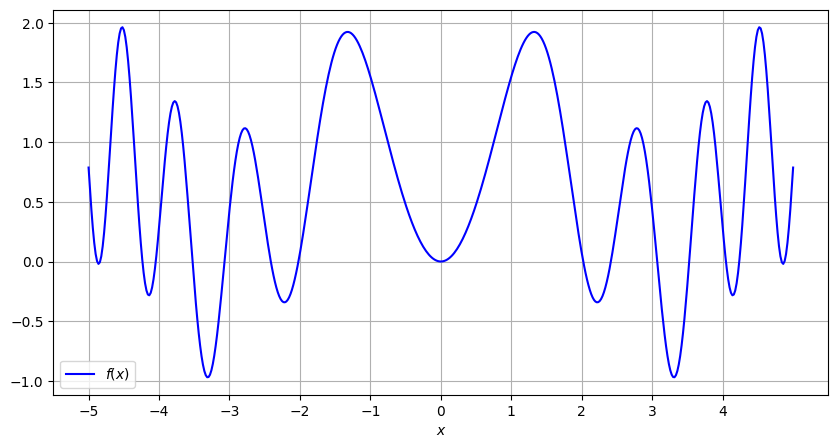

In [66]:
f = lambda x: np.power(np.sin(x),2) + np.sin(np.power(x,2))

a,b = -5.,5.
plt.figure(figsize=(10,5))
x = np.linspace(a,b,500)
y = f(x)
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b))
plt.legend(loc='best')
plt.show()

# Funciones Entregadas (No debe modificarlas)

In [67]:
def Lagrange(x, y):
    n = len(x)
    l = np.array([y[i]/np.prod(x[i] - np.delete(x,i)) for i in range(n)])
    p = lambda xp: np.dot(l,[np.prod(xp - np.delete(x,j)) for j in range(n)])    
    return np.vectorize(p)

def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2

Si obtenemos un polinomio $p(x)$ mediante una interpolación de Lagrange con $n = 40$ puntos equiespaciados y luego evaluamos en $m = 80$ puntos equiespaciados, se tiene el siguiente resultado: 

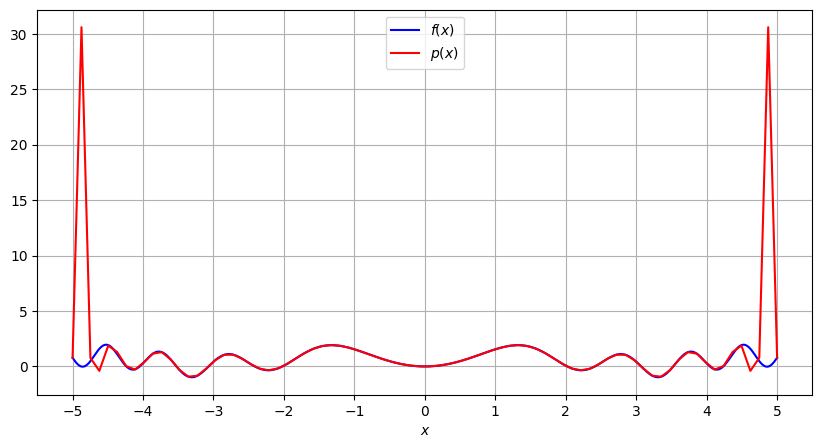

In [68]:
#No modificar código
n = 40
xp = np.linspace(a,b,n)
yp = f(xp)
pLag = Lagrange(xp,yp)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
m = 80
xx = np.linspace(a,b,m)
yy = pLag(xx)
plt.plot(xx,yy,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

Podemos notar que no en todo el intervalo de interés $[-5,5]$ el polinomio se ajusta, ya que se observa el fenómeno Runge cerca del inicio y final del intervalo.

¿Podemos mejorar la aproximación? Probemos utilizando los puntos de Chebyshev en nuestro intervalo de interés:

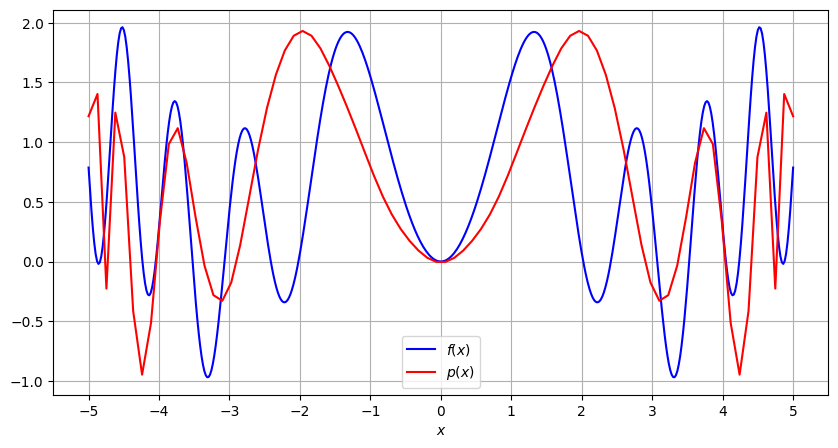

In [69]:
#No modificar código
n = 40
xc = Chebyshev_points(a,b,n)
yc = f(xp)
pLag = Lagrange(xc,yc)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
m = 80
xx = np.linspace(a,b,m)
yy = pLag(xx)
plt.plot(xx,yy,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

Al parecer sí mejora bastante la aproximación. Sin embargo, dada la forma que tiene la función, apostaremos a otra técnica para mejorar las aproximaciones realizadas hasta ahora. Utilizaremos **piecewise interpolation**.

Este tipo de interpolación consiste en realizar *interpolaciones por parte*, es decir, calcular polinomios interpoladores $p_k(x)$ con $k = 1,\dots,d$ para $d$ intervalos. Por ejemplo si $d = 2$, entonces $p_1(x)$ es el polinomio interpolador para el intervalo $[-5,0]$ y $p_2$ es el polinomio interpolador para $[0,5]$. Cada polinomio interpolador, por supuesto, utiliza $n$ puntos para la aproximación. 

En caso de evaluar algún punto $x_j \in [-5,5]$, se debe considerar el polinomio interpolador correspondiente, es decir, si $x_j \in [-5,0]$ se debe evaluar $p_1(x_j)$, en cambio si $x_j \in [0,5]$ se debe evaluar $p_2(x_j)$.

# Pregunta 1. (15 puntos)

Construya la función **lin_pol_interval** que permita construir, mediante la interpolación de Lagrange, un polinomio interpolador lineal en un intervalo $[x_i,x_f]$ para una función $f(x)$ con puntos equiespaciados.

In [70]:
def lin_pol_interval(f,xi,xf):
    """
    input:
    f    : (callable) function to evaluate.
    xi   : (double)   initial value of interval.
    xf   : (double)   final value of interval.
    
    output:
    lin_p: (callable) linear polynomial. 
    """
    #acá va su codigo
    #--------------------------------
    #Obtengo 2 puntos equiespaciados dentro del intervalo xi-xf
    puntos_x=np.linspace(xi,xf,2)
    #Utilizo la función f para obtener puntos y correspondiende a los puntos en x obtenidos en la parte anterior
    puntos_y=f(puntos_x)
    #Obtengo interpolador lineal usando Lagrange
    lin_p=Lagrange(puntos_x,puntos_y)
    #--------------------------------
    return lin_p

# Pregunta 2. (15 puntos)

Construya la función **quad_pol_interval** que permita construir, mediante la interpolación de Lagrange, un polinomio interpolador cuadrático en un intervalo $[x_i,x_f]$ para una función $f(x)$ con puntos equiespaciados. *Hint: you need 3 points in the interval for the interpolation.*

In [71]:
def quad_pol_interval(f,xi,xf):
    """
    input:
    f     : (callable) function to evaluate.
    xi    : (double)   initial value of interval.
    xf    : (double)   final value of interval.
    
    output:
    quad_p: (callable) quadratic polynomial. 
    """
    #acá va su codigo
    #--------------------------------
    #Obtengo 3 puntos equiespaciados dentro del intervalo xi-xf
    puntos_x=np.linspace(xi,xf,3)
    #Utilizo la función f para obtener puntos y correspondiende a los puntos en x obtenidos en la parte anterior
    puntos_y=f(puntos_x)
    #Obtengo interpolador lineal usando Lagrange
    quad_p=Lagrange(puntos_x,puntos_y)
    #--------------------------------
    return quad_p

# Pregunta 3. (20 puntos)

Construya la función **piecewise_lin** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios lineales en un intervalo $[a,b]$ para una función $f(x)$ con puntos equiespaciados. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo.

In [72]:
def piecewise_lin(f,a,b,d,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of linear polynomials.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of linear polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    #Se genera un arreglo con las cotas inferiores y superiores de los d intervalos.
    arr_d =np.linspace(a,b,d+1)    
    # Arreglo que guardará d interpoladores correspondientes a los d intervalos ingresados.
    arr_interpol = [lin_pol_interval(f, arr_d[i], arr_d[i+1]) for i in range(d)]
    # Evaluamos cada interpolador en un conjunto de puntos equiespaciados
    x_a = np.linspace(a, b, d * m)
    y_a = np.concatenate([interpolador(x_a[i*m:(i+1)*m]) for i, interpolador in enumerate(arr_interpol)])
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios lineales.

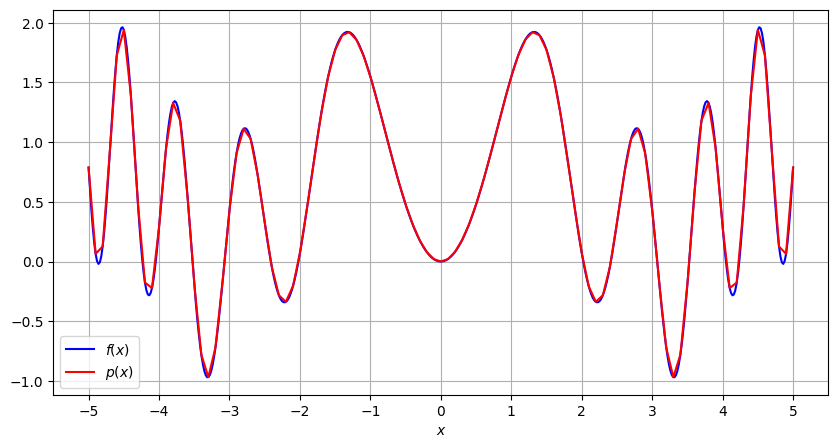

In [73]:
#No modificar este código, solamente ejecute.
d = 100
m = 20
x_a,y_a = piecewise_lin(f,a,b,d,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

# Pregunta 4. (20 puntos)

Construya la función **piecewise_quad** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios cuadráticos en un intervalo $[a,b]$ para una función $f(x)$ con puntos equiespaciados. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo.

In [74]:
def piecewise_quad(f,a,b,d,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of quadratic polynomials.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of quadratic polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    #Se genera un arreglo con las cotas inferiores y superiores de los d intervalos.
    arr_d =np.linspace(a,b,d+1)    
    # Arreglo que guardará d interpoladores correspondientes a los d intervalos ingresados.
    arr_interpol = [quad_pol_interval(f, arr_d[i], arr_d[i+1]) for i in range(d)]
    # Evaluamos cada interpolador en un conjunto de puntos equiespaciados
    x_a = np.linspace(a, b, d * m)
    y_a = np.concatenate([interpolador(x_a[i*m:(i+1)*m]) for i, interpolador in enumerate(arr_interpol)])
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios cuadráticos.

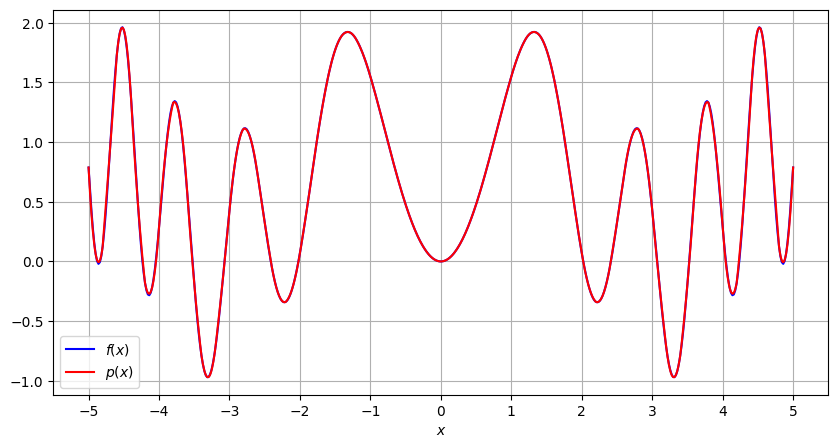

In [75]:
#No modificar este código, solamente ejecute.
d = 50
m = 20
x_a,y_a = piecewise_quad(f,a,b,d,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

# Pregunta 5. (20 puntos)

Construya la función **piecewise_chev** que obtenga, mediante la interpolación de Lagrange, $d$ polinomios de grado $(n-1)$ en un intervalo $[a,b]$ para una función $f(x)$ utilizando $n$ puntos de Chebyshev para cada sub-intervalo $[x_k,x_{k+1}]$. La función debe retornar un **array** con la evaluación de los polinomios para los $d$ intervalos considerando $m$ puntos. Es decir, la función debe obtener $p_1(x),p_2(x),\dots,p_d(x)$ para cada intervalo $[x_1,x_2],[x_2,x_3],\dots,[x_d,x_{d+1}]$, donde $a = x_1$ y $b = x_{d+1}$, y evaluar $m$ puntos en cada intervalo. Considere que $m > n$.

In [76]:
def piecewise_chev(f,a,b,d,n,m):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   initial value of interval.
    b   : (double)   final value of interval.
    d   : (int)      number of polynomials.
    n   : (int)      number of points for Chebyshev interpolation.
    m   : (int)      number of points to evaluate.
     
    output:
    x_a : (ndarray) array with the x values for evaluation. 
    y_a : (ndarray) array with the evaluation of polynomials at x_a.
    """
    #acá va su codigo
    #--------------------------------
    arr_d =np.linspace(a,b,d+1)    
    # Arreglo que contiene los puntos de Chebyshev y los polinomios de Lagrange para los d intervalos
    chev_x = []
    polinomios_Lagrange = []
    for i in range(d):
        # Generar puntos de Chebyshev y evaluar la función en ellos
        cheb_x_i = Chebyshev_points(arr_d[i], arr_d[i+1], n)
        chev_x.append(cheb_x_i)
        chev_y_i = f(cheb_x_i)
        
        # Construir el polinomio de Lagrange para los puntos de Chebyshev
        polinomio_lag_i = Lagrange(cheb_x_i, chev_y_i)
        polinomios_Lagrange.append(polinomio_lag_i)

    # Evaluamos cada polinomio de Lagrangue en un conjunto de puntos equiespaciados
    x_a = np.linspace(a, b, d * m)
    y_a = np.concatenate([poli(x_a[i*m:(i+1)*m]) for i, poli in enumerate(polinomios_Lagrange)])
    #--------------------------------
    return x_a,y_a

En el siguiente gráfico se puede ejecutar la función recién creada por usted para observar la aproximación de una interpolación piecewise con polinomios de grado $(n - 1)$ utilizando puntos de Chebyshev.

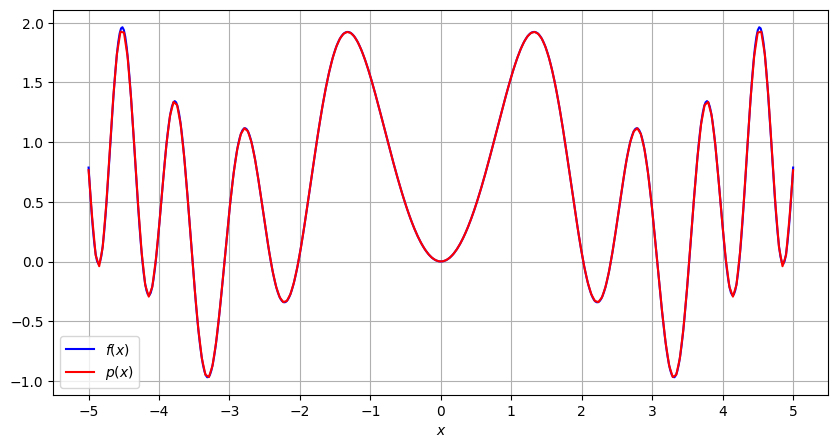

In [77]:
#No modificar este código, solamente ejecute.
d = 10
n = 8
m = 20
x_a,y_a = piecewise_chev(f,a,b,d,n,m)

plt.figure(figsize=(10,5))
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)

plt.plot(x_a,y_a,'-r',label = '$p(x)$',markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(a,b+1))
plt.legend(loc='best')
plt.show()

**¡Ya ha llegado al final de la tarea 3! Ahora debe enviarla antes de las 12:00 hrs. del sábado 18 de mayo!**